In [21]:
#!pip install openpyxl

In [22]:
import os
import string
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.decomposition import PCA



In [23]:
# set number of columns to displa
pd.set_option('display.max_columns', 100)

In [24]:
# read in data, in this case the 10 second summarised version
#df = pd.read_excel('D:\GitHub\MSc-Project\SWaT_DataSWaT_2015_12_22_10sec.xlsx', engine="openpyxl")
df = pd.read_excel('/home/loz/MSc/MSc_Project/SWaT_DataSWaT_2015_12_22_10sec.xlsx', engine="openpyxl")


In [25]:
df.shape

(49500, 41)

In [26]:
df.head()

,Timestamp,FIT101,LIT101,MV101,P101,AIT201,AIT202,AIT203,FIT201,MV201,P203,P205,DPIT301,FIT301,LIT301,MV301,MV302,MV303,MV304,P301,P302,AIT401,AIT402,FIT401,LIT401,P402,UV401,AIT501,AIT502,AIT503,AIT504,FIT501,FIT502,FIT503,FIT504,P501,PIT501,PIT502,PIT503,FIT601,P602
0,2015-12-22 16:30:00,0.0,123.97593,1.0,1.0,251.9226,8.313061,312.79160,0.0,1.0,1.0,1.0,2.560983,0.000256,138.67438,1.0,1.0,1.0,1.0,1.0,1.0,0.0,169.23870,0.0,134.12332,1,1.0,7.446360,175.40632,260.7024,123.31450,0.001538,0.001409,0.001664,0.0,1.0,9.100231,0.0,3.3485,0.000256,1.0
1,2015-12-22 16:30:10,0.0,124.40769,1.0,1.0,251.9226,8.308960,312.90185,0.0,1.0,1.0,1.0,2.560983,0.000256,137.83724,1.0,1.0,1.0,1.0,1.0,1.0,0.0,169.23870,0.0,132.92363,1,1.0,7.444694,175.39090,260.7024,123.31450,0.001538,0.001409,0.001664,0.0,1.0,9.100231,0.0,3.3485,0.000256,1.0
2,2015-12-22 16:30:20,0.0,123.90527,1.0,1.0,251.9226,8.310979,312.80442,0.0,1.0,1.0,1.0,2.560983,0.000256,137.49280,1.0,1.0,1.0,1.0,1.0,1.0,0.0,169.23870,0.0,133.60803,1,1.0,7.445623,175.39090,260.7024,123.41448,0.001538,0.001409,0.001664,0.0,1.0,9.100231,0.0,3.3485,0.000256,1.0
3,2015-12-22 16:30:30,0.0,123.90134,1.0,1.0,251.9226,8.312612,312.91980,0.0,1.0,1.0,1.0,2.560983,0.000256,137.86928,1.0,1.0,1.0,1.0,1.0,1.0,0.0,169.31300,0.0,133.33120,1,1.0,7.444758,175.39090,260.7024,123.37989,0.001538,0.001409,0.001664,0.0,1.0,9.037747,0.0,3.3485,0.000256,1.0
4,2015-12-22 16:30:40,0.0,124.85909,1.0,1.0,251.9226,8.308191,313.00950,0.0,1.0,1.0,1.0,2.560983,0.000256,137.92537,1.0,1.0,1.0,1.0,1.0,1.0,0.0,169.27968,0.0,132.49679,1,1.0,7.444053,175.39090,260.7024,123.45296,0.001538,0.001409,0.001664,0.0,1.0,9.068188,0.0,3.3485,0.000256,1.0


In [27]:
df['Timestamp'].dtype

dtype('<M8[ns]')

In [28]:
df.index.name
# check for duplicates
#df.loc[df.duplicated()]

## Individual  Component Analysis

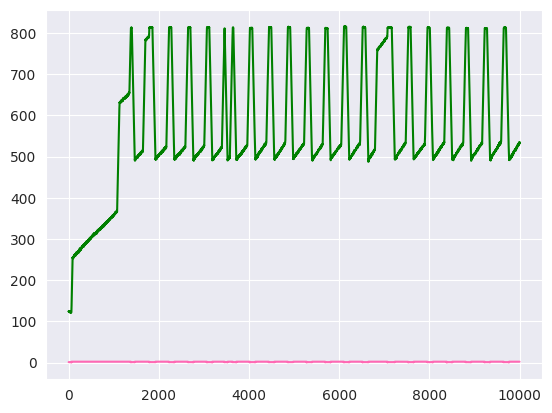

In [29]:
plt.plot(df.MV101.iloc[:10000], c = 'hotpink')
plt.plot(df.LIT101.iloc[:10000], c = 'green')
plt.show()


In [30]:
max_value = df['LIT101'].max()
min_value = df['LIT101'].min()
mean_value = df['LIT101'].mean()
std_value = df['LIT101'].std()
print(f'Max:{max_value}, Min:{min_value}, Mean:{mean_value}, , STD:{std_value}')

Max:817.28166, Min:121.05551, Mean:587.5327728597979, , STD:121.6637780984318


In [31]:
col = df['LIT101']

In [32]:
col.name

'LIT101'

In [33]:
#make_delta_column(df.FIT101)

In [34]:

def get_features(col = pd.Series) -> list:
    '''
    returns list of values which describe the component/ column

    :param col:
    Takes a pd.Seires which is all the values for the component ove the time period
    :return:
    Name of the component
    Max, Min, Mean and STD for the component
    Delta which is the Mean of change in value for each time step
    '''
    name = col.name
    max_value = col.max()
    min_value = col.min()
    mean_value = col.mean()
    std_value = col.std()

    #print(f'Max:{max_value}, Min:{min_value}, Mean:{mean_value}, , STD:{std_value}')

    #return [name, max_value, min_value, mean_value, std_value]
    return pd.Series([ max_value, min_value, mean_value, std_value],
                 index=['Max', 'Min', 'Mean', 'STD'])

# make df without time stamp
df_for_features = df.loc[:, ~df.columns.isin(['Timestamp'])]

# get features for all columns
# Apply the get_features function to each column using apply
component_features = pd.DataFrame()
component_features = df_for_features.apply(get_features).transpose()


In [35]:
#feature_list = get_features(df['LIT101'])
#feature_list

In [36]:
component_features.head(40)

,Max,Min,Mean,STD
FIT101,2.682862,0.000000,1.850517,1.130677
LIT101,817.281660,121.055510,587.532773,121.663778
MV101,2.000000,0.100000,1.720564,0.453235
P101,2.000000,1.000000,1.749149,0.432605
AIT201,271.930280,251.755940,263.783544,4.786958
AIT202,8.987344,8.259677,8.388162,0.090164
AIT203,567.334050,312.278900,348.379334,49.449694
FIT201,2.486669,0.000000,1.834095,1.058171
MV201,2.000000,0.200000,1.746497,0.438908
P203,2.000000,1.000000,1.747244,0.433711


In [37]:
component_features.shape

(40, 4)

<Axes: >

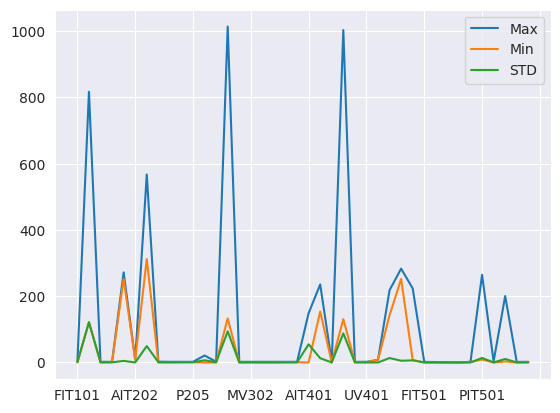

In [38]:
component_features[['Max', 'Min', 'STD']].plot()

In [39]:
# get  df for each component type
lit_df = component_features.loc[component_features.index.str.startswith('LIT'),:]

fit_df = component_features.loc[component_features.index.str.startswith('FIT'),:]

ait_df = component_features.loc[component_features.index.str.startswith('AIT'),:]

pit_df = component_features.loc[component_features.index.str.startswith('PIT'),:]

p_df = component_features.loc[component_features.index.str.match(r'^P\d{3}'),:]

mv_df = component_features.loc[component_features.index.str.startswith('MV'),:]

In [40]:
p_df

,Max,Min,Mean,STD
P101,2.0,1.0,1.749149,0.432605
P203,2.0,1.0,1.747244,0.433711
P205,2.0,1.0,1.661558,0.472180
P301,2.0,1.0,1.003594,0.059655
P302,2.0,1.0,1.823253,0.379355
P402,2.0,1.0,1.997051,0.054230
P501,2.0,1.0,1.996893,0.055626
P602,2.0,1.0,1.007943,0.083777


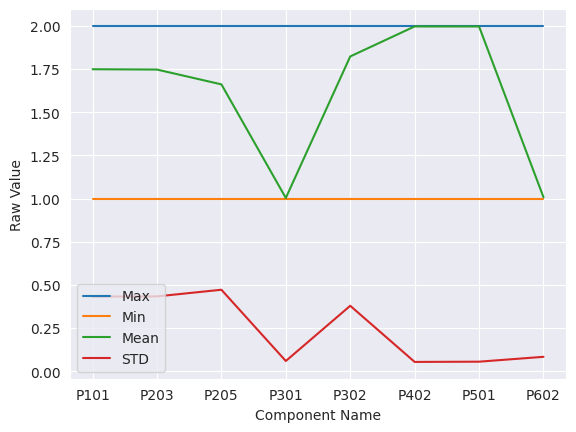

In [41]:
plt.plot(p_df)
plt.xlabel('Component Name')
plt.ylabel('Raw Value')
plt.legend(ait_df.columns)
plt.show()

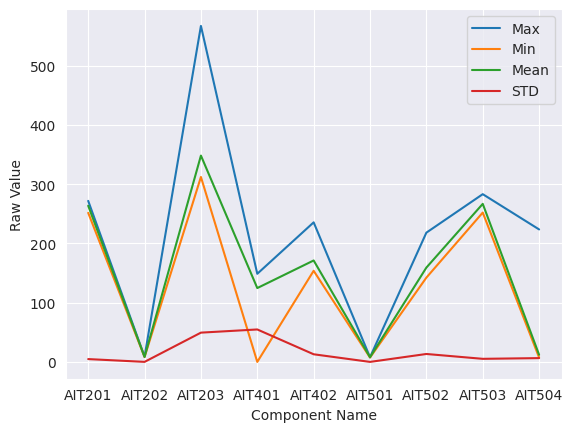

In [42]:
plt.plot(ait_df)
plt.xlabel('Component Name')
plt.ylabel('Raw Value')
plt.legend(ait_df.columns)
plt.show()

## Plot Coefficients of Vairation

To account for varying units/ magnitudes across data the coeficient of means calculates the ratio of the std to mean


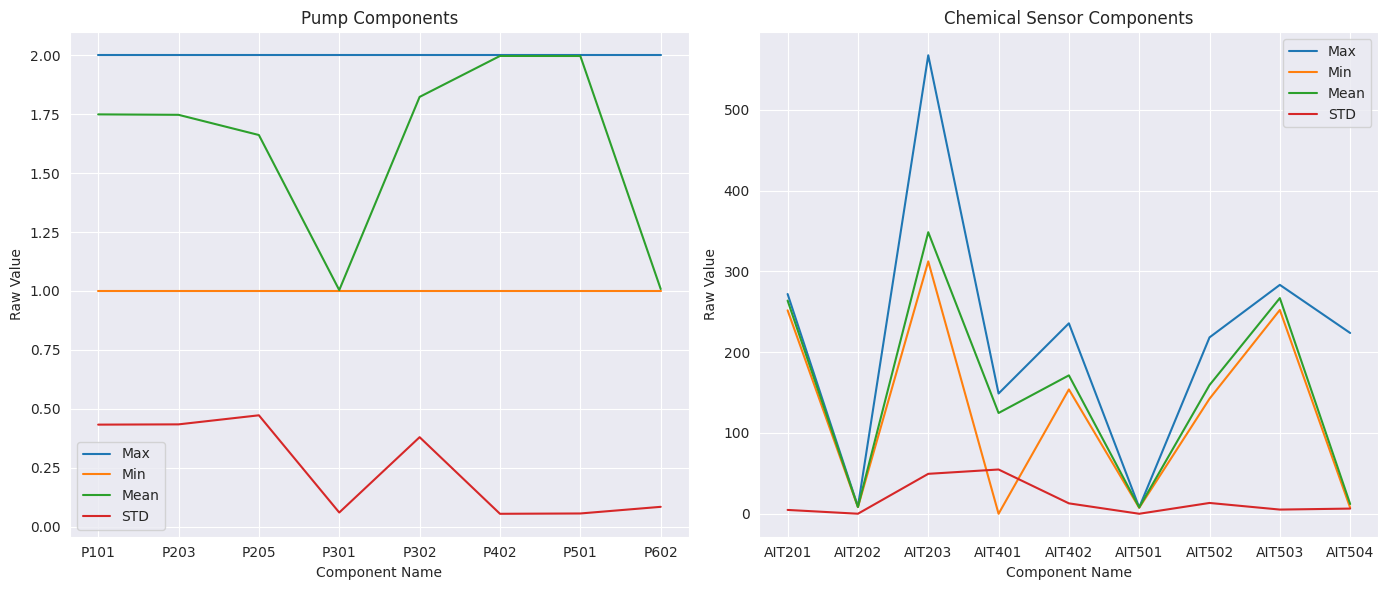

In [43]:
fig, axes = plt.subplots(1,2, figsize=(14,6))

axes[0].plot(p_df)
axes[0].set_xlabel('Component Name')
axes[0].set_ylabel('Raw Value')
axes[0].legend(ait_df.columns)
axes[0].set_title('Pump Components')

axes[1].plot(ait_df)
axes[1].set_xlabel('Component Name')
axes[1].set_ylabel('Raw Value')
axes[1].legend(ait_df.columns)
axes[1].set_title('Chemical Sensor Components')

# Save the figure as a JPEG file
#plt.savefig('D:\GitHub\MSc-Project-March\Write_Up\Charts\component_values_comparison.jpeg', format='jpeg')

plt.tight_layout()
plt.show()

In [44]:
component_features.columns


Index(['Max', 'Min', 'Mean', 'STD'], dtype='object')

In [45]:
component_features['coef_var'] = component_features['STD']/ component_features['Mean']

In [46]:
sorted_component_features = component_features.sort_values(by='coef_var', ascending=False)

### Shows good grouping of component just from coeficient of variance but no better than mean and std when KMeans applied. Use insted to filter out values with low information value

In [47]:
sorted_component_features

,Max,Min,Mean,STD,coef_var
FIT601,1.742043,0.000000,0.014427,0.145082,10.056226
FIT101,2.682862,0.000000,1.850517,1.130677,0.611006
FIT201,2.486669,0.000000,1.834095,1.058171,0.576945
AIT504,223.715710,7.475006,12.083752,6.435457,0.532571
FIT301,2.345732,0.000000,1.837282,0.818665,0.445585
AIT401,148.825280,0.000000,124.717129,54.808589,0.439463
DPIT301,21.055124,0.022409,16.604740,6.719335,0.404664
P205,2.000000,1.000000,1.661558,0.472180,0.284179
MV101,2.000000,0.100000,1.720564,0.453235,0.263423
MV201,2.000000,0.200000,1.746497,0.438908,0.251308


In [48]:
def get_value_dist(data_series : pd.Series, series_name: str = 'Unnamed Series'):
    std_values = data_series

    # normalise
    std_values = (std_values - std_values.min()) / (std_values.max() - std_values.min())

    # make bins
    std_bins = np.linspace(std_values.min(), std_values.max(),40)
    #std_bins = np.linspace(std_values.min(), std_values.max(),40)
    std_bins = np.logspace(np.log10(std_values.min() + 1e-10), np.log10(std_values.max() + 1e-10), 40)


    # Digitise the data into the bins
    std_binned = np.digitize(std_values, std_bins, right=True)

    # Count the values in each bin and keep empty
    bin_counts = pd.Series(std_binned).value_counts(sort=False).reindex(range(1, len(std_bins)), fill_value=0)

    plt.figure(figsize=(10, 6))
    bin_centers = 0.5 * (std_bins[:-1] + std_bins[1:])  # Calculate bin centers for plotting
    plt.bar(bin_centers, bin_counts, width=(std_bins[1] - std_bins[0]), align='center',
            color='skyblue', edgecolor='grey', linewidth=0.5)
    plt.title('Count of {} by Binned Standard Deviation'.format(series_name))
    plt.xlabel('{} (Binned)'.format(series_name))
    plt.xscale('log')
    plt.ylabel('Count of Values')
    plt.show()


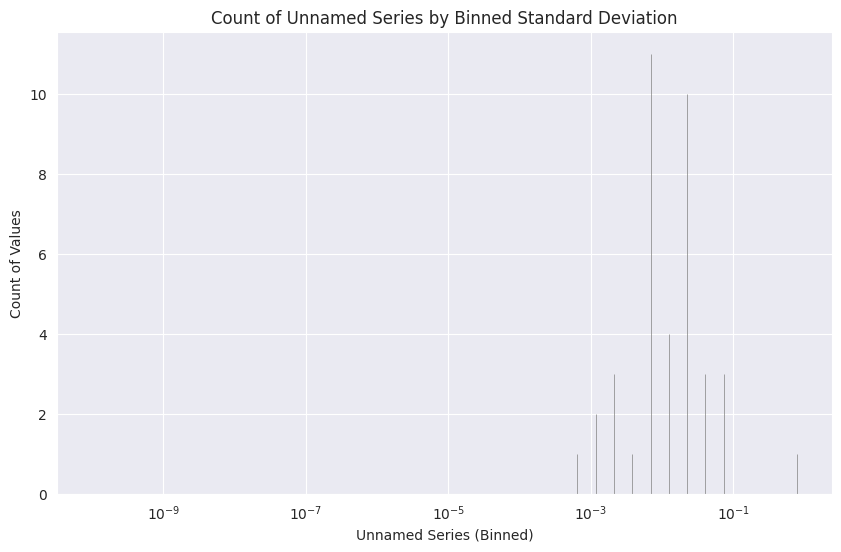

In [49]:
get_value_dist(component_features['coef_var'])


# Log Trial

In [50]:
np.logspace( component_features['coef_var'].min(), component_features['coef_var'].max(), 10)

array([1.01258982e+00, 1.32491585e+01, 1.73357660e+02, 2.26828580e+03,
       2.96792220e+04, 3.88335641e+05, 5.08114970e+06, 6.64839370e+07,
       8.69904280e+08, 1.13821998e+10])

In [51]:


log_thresholds = np.logspace(np.log10(data_series.min() + 1e-10), np.log10(data_series.max()), 10)

def get_value_dist(data_series: pd.Series, series_name: str = 'Unnamed Series', thresholds=log_thresholds):
    if thresholds is None:
        # thresholds = [0.01, 0.02, 0.04, 0.08, 0.16]
        thresholds = [np.linspace( component_features['coef_var'].min(), component_features['coef_var'].max(), 100)]








NameError: name 'data_series' is not defined

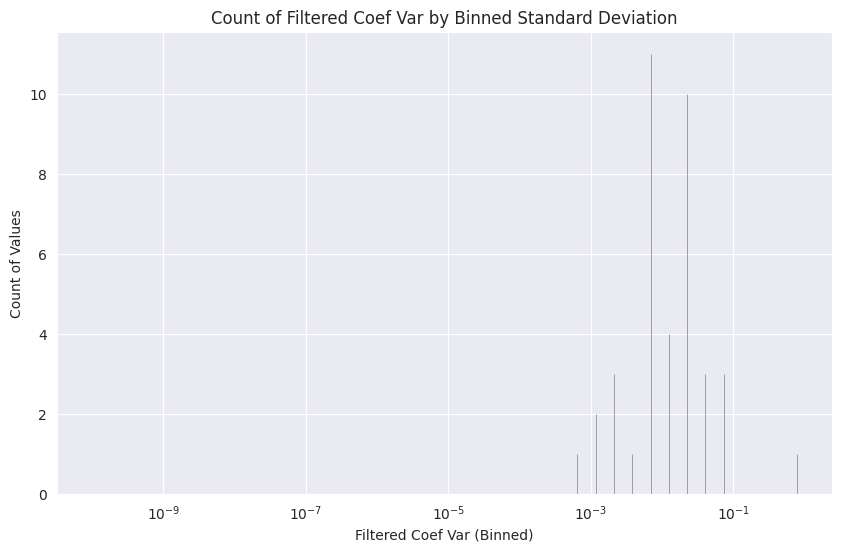

In [52]:
#data = pd.Series(np.random.lognormal(mean=1, sigma=1, size=1000))
#thresholds = np.linspace(0,0.2, 20)

get_value_dist(component_features['coef_var'], "Filtered Coef Var")


## Cluster Components
 The task involves using the (cluster) which facilitates a visual representation. This allows users to observe patterns and trends
which would be lost when interrogating the raw datasets

In [53]:
def k_means_by_threshold(component_features: pd.DataFrame, thresholds: list =None):
    #thresholds = [0, 0.01, 0.015, 0.08, 0.02, 0.04, 0.16]

    if thresholds == None:
        # calculate filter thresholds
        thresholds = np.logspace(np.log10(component_features['coef_var'].min() + 1e-10), np.log10(component_features['coef_var'].mean()), 20).round(3)
        # get first half of data thresholds to account for outliers
        #cluster_thresholds = np.linspace( 0, .1, 5).round(3)
        #cluster_thresholds = cluster_thresholds[:4]
        cluster_thresholds = [0.005, 0.021, 0.07, 0.1, 0.2]

    K = range(1,11)
    inertia_dict = {}
    component_counts = []

    # set colours for thresholds
    colors = plt.cm.plasma(np.linspace(0, 1, len(cluster_thresholds)))

    for threshold in thresholds:
        # Filter the data_series based on the threshold
        filtered_component_features = component_features[component_features['coef_var'] > threshold]

        # get count of components left after filter
        component_counts.append(filtered_component_features.shape[0])

    for threshold in cluster_thresholds:

        # Filter the data_series based on the threshold
        filtered_component_features = component_features[component_features['coef_var'] > threshold]

        inertia = []
        for k in K:
            # Cluster the components by their features with and without coef of variance
            kmeans = KMeans(n_clusters=k, random_state=44)

            kmeans.fit(filtered_component_features)
            inertia.append(kmeans.inertia_)
        inertia_dict[threshold] = inertia


    fig, axes = plt.subplots(1, 2, figsize=(16, 6))

    # Plot number of components
    axes[0].plot(thresholds, component_counts, marker='o', linestyle='-', color='blue')
    axes[0].set_xlabel('CV Filter Threshold')
    axes[0].set_xscale('log')
    axes[0].set_ylabel('Number of Components')
    axes[0].set_title('Number of Components by Coefficient of Variation')
    #axes[0].set_xticks(thresholds)

    # Plot vertical lines for cluster thresholds
    # Plot vertical lines for cluster thresholds with consistent colours
    for i, ct in enumerate(cluster_thresholds):
        axes[0].axvline(x=ct, color=colors[i], linestyle='--', label=f'Threshold = {ct:.3f}')

    # Plot the elbow plot with consistent colors
    for i, (threshold, inertia) in enumerate(inertia_dict.items()):
        axes[1].plot(K, inertia, marker='x', linestyle='-', color=colors[i], label=f'Threshold = {threshold:.3f}')



    axes[1].set_xlabel('Number of clusters')
    axes[1].set_ylabel('Inertia')
    axes[1].set_title('Elbow Plot for Different Coef Var Thresholds')
    axes[1].legend(title="Thresholds")



    plt.tight_layout()

    # Save as JPEG
    plt.savefig('D:\GitHub\MSc-Project\Write_Up\Charts\coef_var_filter_k_means.jpeg', format='jpeg')
    plt.show()

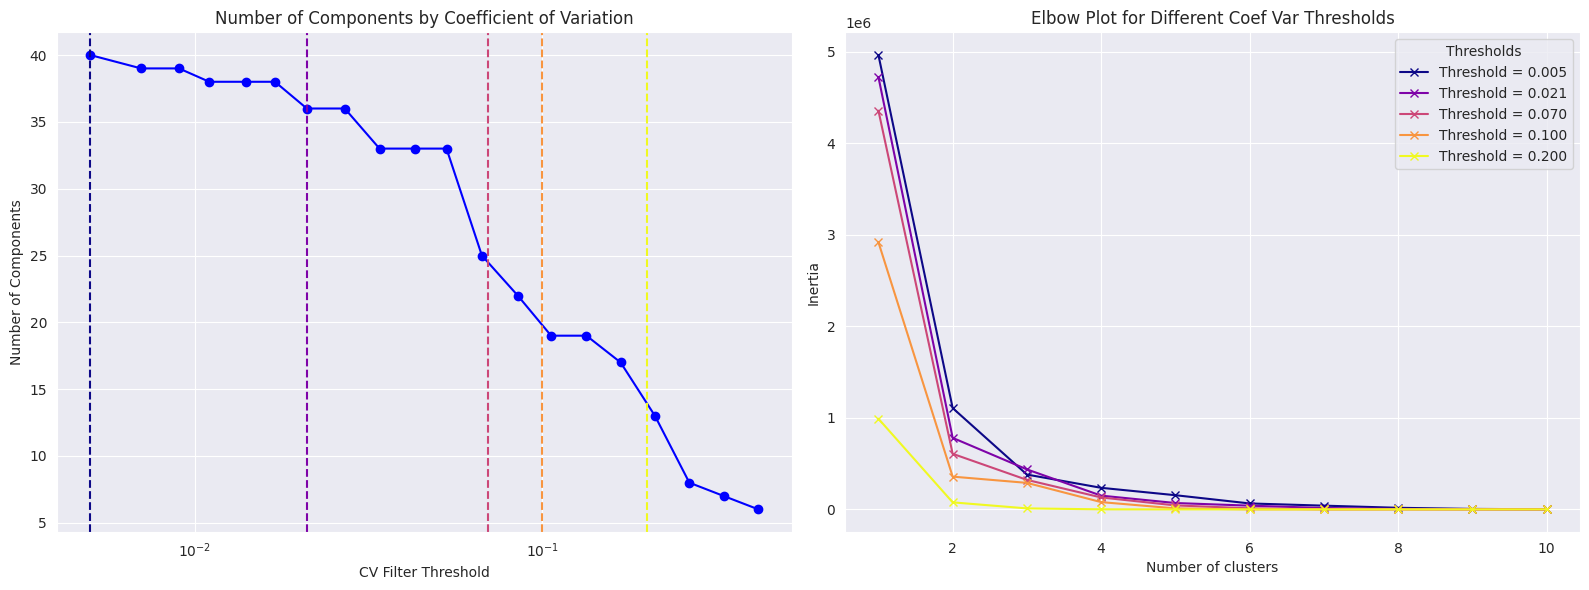

In [54]:
k_means_by_threshold(component_features)

## next section

# Make component number graph seperately with mor points ethen use 2nd derivative to find region where change of gradient ( reduciton ) is fastest- indicating where most components are lost in a short space of time....... filtering the noise.

# Use elbo pllot to show why this is a reasonble cut off

### Fileter componetns to those with coefr var above a threshold

In [55]:
 filtered_component_features.head()

NameError: name 'filtered_component_features' is not defined

In [56]:
#component_features.to_csv('D:\GitHub\MSc-Project-March\kmeans_componennt_clusters.csv', index=True)

component_features = pd.merge(component_features, non_lin_correlation_matrix, how = 'left', left_index=True, right_index=True)
component_features = component_features.drop(columns=['PCA1','PCA2'])

component_features = component_features.drop(columns=['Max','Min','STD','Mean'])

In [57]:
threshold = 0.015
filtered_component_features = component_features[component_features['coef_var'] > threshold]
filtered_component_features.shape


if 'cluster' in filtered_component_features.columns:
    component_features.drop(colums='Cluster')

K = 5
kmeans = KMeans(n_clusters=K, random_state=44)
clustered_components = filtered_component_features.copy()
clustered_components['Cluster'] = kmeans.fit_predict(clustered_components)
# Group by cluster and store component names in a dictionary
clusters = {}
for cluster in range(K):
    clusters[f'Cluster {cluster}'] = clustered_components[clustered_components['Cluster'] == cluster].index.tolist()



In [58]:
# Display the grouped components by cluster and forast for latex

# Latex table code
latex_table = "\\begin{table}[h!]\n\\centering\n\\begin{tabular}{|c|l|c|}\n\\hline\n"
latex_table += "Cluster & Components & No. Components \\\\\n\\hline\n"

for cluster, components in clusters.items():
    # Split components into lines with a max of 10 components per line
    component_lines = [', '.join(components[i:i+10]) for i in range(0, len(components), 10)]
    component_str = ' \\\\ '.join(component_lines)
    latex_table += f"{cluster} & {component_str}  \\\\\n"

latex_table += "\\hline\n\\end{tabular}\n\\caption{Clustered Components}\n\\label{tab:clusters}\n\\end{table}"

print(latex_table)

\begin{table}[h!]
\centering
\begin{tabular}{|c|l|c|}
\hline
Cluster & Components & No. Components \\
\hline
Cluster 0 & FIT101, MV101, P101, FIT201, MV201, P203, P205, DPIT301, FIT301, MV301 \\ MV302, MV303, MV304, P301, P302, FIT401, P402, UV401, FIT501, FIT502 \\ FIT503, FIT504, P501, PIT502, FIT601, P602  \\
Cluster 1 & LIT101  \\
Cluster 2 & AIT201, AIT401, AIT402, AIT502, AIT503, AIT504, PIT501, PIT503  \\
Cluster 3 & LIT301, LIT401  \\
Cluster 4 & AIT203  \\
\hline
\end{tabular}
\caption{Clustered Components}
\label{tab:clusters}
\end{table}


In [59]:
if 'cluster' in component_features.columns:
    component_features.drop(colums='Cluster')

K = 5
kmeans = KMeans(n_clusters=K, random_state=44)
clustered_components = component_features.copy()
clustered_components['Cluster'] = kmeans.fit_predict(clustered_components)
# Group by cluster and store component names in a dictionary
clusters = {}
for cluster in range(K):
    clusters[f'Cluster {cluster}'] = clustered_components[clustered_components['Cluster'] == cluster].index.tolist()

# Display the grouped components by cluster
for cluster, components in clusters.items():
    print(f'{cluster}: {components}, No. Components: {len(components)}')

Cluster 0: ['FIT101', 'MV101', 'P101', 'AIT202', 'FIT201', 'MV201', 'P203', 'P205', 'DPIT301', 'FIT301', 'MV301', 'MV302', 'MV303', 'MV304', 'P301', 'P302', 'FIT401', 'P402', 'UV401', 'AIT501', 'FIT501', 'FIT502', 'FIT503', 'FIT504', 'P501', 'PIT502', 'FIT601', 'P602'], No. Components: 28
Cluster 1: ['LIT101'], No. Components: 1
Cluster 2: ['AIT201', 'AIT401', 'AIT402', 'AIT502', 'AIT503', 'AIT504', 'PIT501', 'PIT503'], No. Components: 8
Cluster 3: ['LIT301', 'LIT401'], No. Components: 2
Cluster 4: ['AIT203'], No. Components: 1


In [60]:
clustered_components.index

Index(['FIT101', 'LIT101', 'MV101', 'P101', 'AIT201', 'AIT202', 'AIT203',
       'FIT201', 'MV201', 'P203', 'P205', 'DPIT301', 'FIT301', 'LIT301',
       'MV301', 'MV302', 'MV303', 'MV304', 'P301', 'P302', 'AIT401', 'AIT402',
       'FIT401', 'LIT401', 'P402', 'UV401', 'AIT501', 'AIT502', 'AIT503',
       'AIT504', 'FIT501', 'FIT502', 'FIT503', 'FIT504', 'P501', 'PIT501',
       'PIT502', 'PIT503', 'FIT601', 'P602'],
      dtype='object')

In [61]:
clustered_components.loc['AIT201']

Max         271.930280
Min         251.755940
Mean        263.783544
STD           4.786958
coef_var      0.018147
Cluster       2.000000
Name: AIT201, dtype: float64

### Fairly effective considering......

## DBSCAN

In [ ]:
#drop pca#
#df_for_cluster = component_features.drop(columns=['PCA1','PCA2','Cluster'])
df_for_cluster = component_features.drop(columns=['Cluster'])


In [ ]:
scaler = MinMaxScaler()

In [ ]:
scaled_df_for_cluster = pd.DataFrame(scaler.fit_transform(df_for_cluster), columns=df_for_cluster.columns)
scaled_df_for_cluster

In [ ]:
# Apply DBSCAN clustering
dbscan = DBSCAN(eps=0.5, min_samples=2)  # Adjust `eps` and `min_samples` as needed
component_features['Cluster'] = dbscan.fit_predict(scaled_df_for_cluster)

In [ ]:
component_features['Cluster'].value_counts()

In [ ]:
grouped = component_features.groupby('Cluster')

In [ ]:
for cluster, group in grouped:
    print(f"Cluster {cluster}:")
    print(group)
    print("\n")

# Calculate cosine similarity

In [ ]:
# Compute cosine similarity between the components
cosine_sim = cosine_similarity(component_features)

# Create a DataFrame to display the similarity matrix
cosine_sim_df = pd.DataFrame(cosine_sim, index=component_features.index, columns=component_features.index)

# Display the cosine similarity matrix
print("Cosine Similarity Matrix:")
print(cosine_sim_df)

In [ ]:
# Extract the upper triangle of the similarity matrix without the diagonal
cosine_sim_df.values[np.tril_indices_from(cosine_sim_df, k=0)] = np.nan

In [ ]:
cosine_sim_df

In [ ]:
# Melt the DataFrame to long format and sort by similarity
cosine_sim_long = cosine_sim_df.stack().reset_index()
cosine_sim_long.columns = ['Component 1', 'Component 2', 'Cosine Similarity']
cosine_sim_long = cosine_sim_long.sort_values(by='Cosine Similarity', ascending=False).reset_index(drop=True)

In [ ]:
cosine_sim_long.loc[cosine_sim_long['Component 1'] == 'FIT501',:]

In [ ]:
type(cosine_sim_long)

# Dimesionality Reduction

In [ ]:
# Perform PCA for 2-dimensional representation
pca = PCA(n_components=2)
pca_result = pca.fit_transform(component_features.drop('Cluster', axis=1))

# Add PCA results to the DataFrame
component_features['PCA1'] = pca_result[:, 0]
component_features['PCA2'] = pca_result[:, 1]

# Plot the 2-dimensional representation
plt.figure(figsize=(10, 8))
scatter = plt.scatter(component_features['PCA1'], component_features['PCA2'],
                      c=component_features['Cluster'], cmap='viridis')
plt.title('2D PCA Representation of Components Colored by Cluster')
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.legend(*scatter.legend_elements(), title="Clusters")

# Add component names as labels
for i, component in component_features.iterrows():
    plt.text(component['PCA1'] + 0.02, component['PCA2'], i)

plt.show()

# Non Linear Correlation Cooef

In [ ]:
non_lin_correlation_matrix = pd.read_csv(r'D:\GitHub\MSc-Project-March\non_lin_cor_matrix.csv')
non_lin_correlation_matrix = non_lin_correlation_matrix.set_index('Unnamed: 0')

In [ ]:
non_lin_correlation_matrix.head()